# Estadística Aplicada
## Alejandro Hernández Cerda 1903855
### 2 de mayo de 2023

# Pronóstico del IGAE (base 2013)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Las de series
##Series de tiempo
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

## Modelo ARMA
from statsmodels.tsa.arima.model import ARIMA

In [4]:
IGAE = pd.read_excel('IGAE.xlsx')
IGAE

,Periodos,IGAE
0,2000/01,79.325572
1,2000/02,78.799329
2,2000/03,78.714380
3,2000/04,79.247601
4,2000/05,79.795178
...,...,...
273,2022/10,113.237145
274,2022/11,112.815614
275,2022/12,113.276229
276,2023/01,113.982481


In [13]:
#Esto es debido a que el formato de fecha viene dado como en sql
##Por lo tanto debemos convertirlo a Año/mes/dia
IGAE['Periodos']=pd.to_datetime(IGAE['Periodos'],format='%Y/%m')
IGAE

,Periodos,IGAE
0,2000-01-01,79.325572
1,2000-02-01,78.799329
2,2000-03-01,78.714380
3,2000-04-01,79.247601
4,2000-05-01,79.795178
...,...,...
273,2022-10-01,113.237145
274,2022-11-01,112.815614
275,2022-12-01,113.276229
276,2023-01-01,113.982481


In [9]:
##definir la frecuencia y vamos a convertir la fecha en el index
IGAE.index

RangeIndex(start=0, stop=278, step=1)

In [21]:
IGAE = IGAE.set_index('Periodos')

In [22]:
IGAE = IGAE.asfreq('MS')

In [23]:
IGAE.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01'],
              dtype='datetime64[ns]', name='Periodos', length=278, freq='MS')

**Para poder ejecutar tecnicas de series de tiempo se tiene que dar formato y frecuencia de tiempo al index**

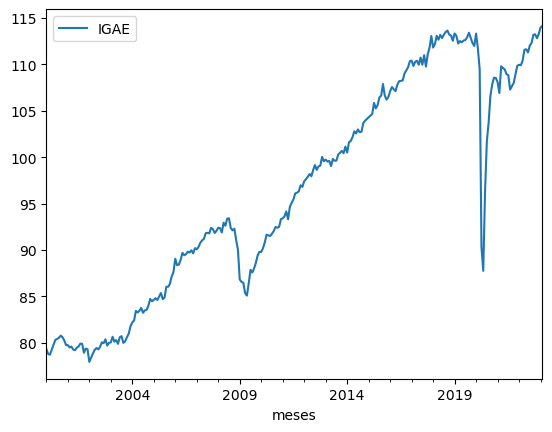

In [26]:
# Gráfica 1
IGAE.plot()
plt.xlabel('meses')
plt.show()

### El proceso no parece un proceso estacionario, pero se parece a un proceso de caminara aleatoria con deriva

$$ H_o:~La~serie~no~es~estacionaria $$
$$ H_1:~La~serie~es~estacionaria $$

In [27]:
#Verificaremos si este es un promedio estacionario
# Hacemos la prueba de dickey fuller (raíz unitaria)
ADF_test=adfuller(IGAE['IGAE'])
#significancia
alpha=0.05
if ADF_test[1]<alpha:
    print('se rechaza Ho, La serie es estacionaria')
else:
    print('no se rechaza Ho, La serie NO es estacionaria')


no se rechaza Ho, La serie NO es estacionaria


Como la serie es NO estacionaria, tenemos que volverla estacionaria\
Esto es aplicando primeras diferencias:\

$\Delta Y_t = Y_t - Y_{t-1}$

In [29]:
#Aplicando primeras diferencias a la serie
IGAE['IGAE_diferenciado_1']=IGAE['IGAE'].diff()

In [30]:
IGAE

,IGAE,IGAE_diferenciado_1
Periodos,,
2000-01-01,79.325572,NaN
2000-02-01,78.799329,-0.526243
2000-03-01,78.714380,-0.084950
2000-04-01,79.247601,0.533221
2000-05-01,79.795178,0.547577
...,...,...
2022-10-01,113.237145,0.038213
2022-11-01,112.815614,-0.421531
2022-12-01,113.276229,0.460615


In [32]:
#Verificaremos si este es un promedio estacionario
# Hacemos la prueba de dickey fuller (raíz unitaria)
#Tenemos que dropear el valor NaN debido a que como en la columna existe un nulo, ocurre un error
ADF_test1=adfuller(IGAE['IGAE_diferenciado_1'].dropna())
#significancia
alpha=0.05
if ADF_test1[1]<alpha:
    print('se rechaza Ho, La serie es estacionaria')
else:
    print('no se rechaza Ho, La serie NO es estacionaria')

se rechaza Ho, La serie es estacionaria


El IGAE diferenciado una vez, es un proceso estacionario

(-1.0, 1.0)

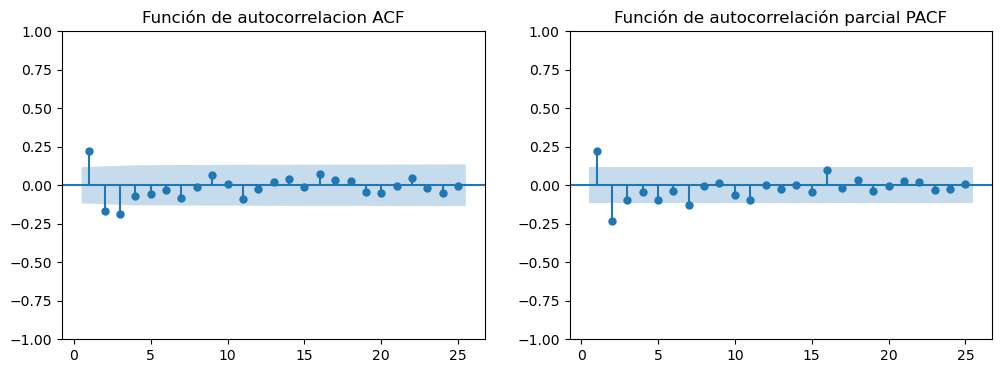

In [36]:
fig, ax=plt.subplots(1,2,figsize=(12,4))
## subgrafico 0
plot_acf(IGAE['IGAE_diferenciado_1'].dropna(),zero=False,ax=ax[0],title='Función de autocorrelacion ACF')
ax[0].set_ylim(-1,1)
## subgrafico 1
plot_pacf(IGAE['IGAE_diferenciado_1'].dropna(),zero=False,ax=ax[1],title='Función de autocorrelación parcial PACF')
ax[1].set_ylim(-1,1)

Un modelo ARIMA(p,I,q)\
p:Es la parte AR(p)\
I: Orden de integración, cuantas veces se diferencia la serie para hacerla estacionaria\
q: Es la parte de MA(q)

In [44]:
modelo = ARIMA(IGAE['IGAE_diferenciado_1'].dropna(),order=(2,1,0))
resultado =modelo.fit()
print(resultado.summary())

                                SARIMAX Results                                
Dep. Variable:     IGAE_diferenciado_1   No. Observations:                  277
Model:                  ARIMA(2, 1, 0)   Log Likelihood                -534.653
Date:                 Tue, 02 May 2023   AIC                           1075.306
Time:                         16:18:20   BIC                           1086.168
Sample:                     02-01-2000   HQIC                          1079.665
                          - 02-01-2023                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3255      0.012    -27.577      0.000      -0.349      -0.302
ar.L2         -0.3212      0.015    -22.121      0.000      -0.350      -0.293
sigma2         2.8163      0.043     65.016 

Este es un modelo AR(2) $Y_t = -.32Y_t - .32Y_{t-1} + \varepsilon_t$

$\varepsilon~normalest(0,\sigma^2_{\varepsilon} = 2.81)$

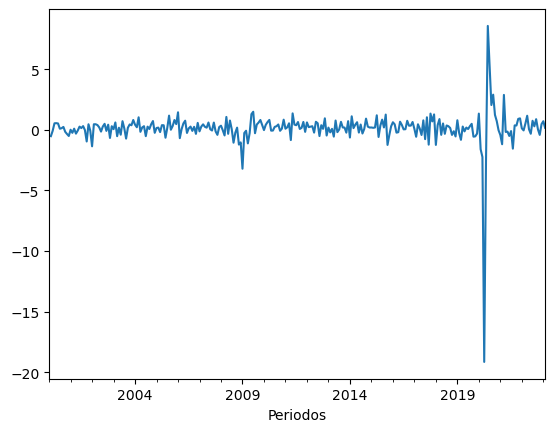

In [45]:
IGAE['IGAE_diferenciado_1'].plot()
plt.show()

AIC es el criteio de Akaike (akaike criterion),BIC Criterio de bayesiano de informacion\
AIC,BIC,HQIC son medidas de bondad de ajuste para comparar modelos "similares",\
El mejor modelo o el modelo "real" es el que tiene menor valor AIC(o modelo de akaike)

In [48]:
# vamos a estimar varios modelos y que se guarde el AIC y BIC
ic={}
for ar in range(7):
    for ma in range(7):
        print(f'AR: {ar},MA: {ma}')
        modelo = ARIMA(IGAE['IGAE_diferenciado_1'].dropna(),order=(ar,1,ma))
        resultado = modelo.fit()
        ic[(ar,ma)] = [resultado.aic,resultado.bic]

ic = pd.DataFrame(ic,index=['AIC','BIC']).T
ic.index=ic.index.set_names(['AR','MA'])

AR: 0,MA: 0
AR: 0,MA: 1
AR: 0,MA: 2
AR: 0,MA: 3


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0,MA: 4


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0,MA: 5


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0,MA: 6


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1,MA: 0
AR: 1,MA: 1


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1,MA: 2
AR: 1,MA: 3
AR: 1,MA: 4


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1,MA: 5


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1,MA: 6


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2,MA: 0
AR: 2,MA: 1
AR: 2,MA: 2
AR: 2,MA: 3


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2,MA: 4


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2,MA: 5


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2,MA: 6


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3,MA: 0
AR: 3,MA: 1
AR: 3,MA: 2


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3,MA: 3


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3,MA: 4


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3,MA: 5


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3,MA: 6


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4,MA: 0
AR: 4,MA: 1
AR: 4,MA: 2
AR: 4,MA: 3


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4,MA: 4


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4,MA: 5


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4,MA: 6


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5,MA: 0
AR: 5,MA: 1
AR: 5,MA: 2
AR: 5,MA: 3


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5,MA: 4


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5,MA: 5


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5,MA: 6


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6,MA: 0
AR: 6,MA: 1
AR: 6,MA: 2


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6,MA: 3
AR: 6,MA: 4


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6,MA: 5


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6,MA: 6


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
ic

AIC          BIC
AR MA                          
0  0   1118.837789  1122.458190
   1   1004.998535  1012.239336
   2    985.963505   996.824708
   3    986.037910  1000.519514
   4    976.999158   995.101162
   5    977.683325   999.405731
   6    977.307097  1002.649903
1  0   1103.568042  1110.808844
   1    992.424407  1003.285610
   2    987.216423  1001.698026
   3    988.354525  1006.456530
   4    975.907470   997.629875
   5    980.479559  1005.822365
   6    979.606955  1008.570161
2  0   1075.306385  1086.167588
   1    979.727908   994.209511
   2    975.786161   993.888165
   3    987.161031  1008.883437
   4    980.171893  1005.514699
   5    990.816734  1019.779941
   6    978.864182  1011.447790
3  0   1053.545410  1068.027013
   1    979.293959   997.395963
   2    980.956766  1002.679172
   3    979.778234  1005.121040
   4    978.398750  1007.361957
   5    980.417503  1013.001111
   6    989.154180  1025.358188
4  0   1046.031856  1064.133861
   1    980.871241  1002.593646
   2    982.185533  1007.528339
   3    986.027449  1014.990656
   4    981.769682  1014.353290
   5    981.614130  1017.818138
   6    984.143016  1023.967425
5  0   1035.994766  1057.717171
   1    980.491802  1005.834608
   2    982.420505  1011.383712
   3    981.358940  1013.942548
   4    984.026430  1020.230439
   5    986.700870  1026.525280
   6    986.873469  1030.318279
6  0   1034.850760  1060.193566
   1    982.148164  1011.111370
   2    983.658457  1016.242065
   3    986.822892  1023.026900
   4    985.877848  1025.702258
   5    986.146425  1029.591236
   6    987.770768  1034.835980

In [50]:
#Como el mejor modelo es el que tiene su AIC menor
#Ordenamo AIC de menor a mayor
ic.sort_values('AIC',ascending=True)[0:5]

AIC          BIC
AR MA                         
2  2   975.786161   993.888165
1  4   975.907470   997.629875
0  4   976.999158   995.101162
   6   977.307097  1002.649903
   5   977.683325   999.405731

Segun el AIC, podemos decir que el mejor modelo es el AIC

In [51]:
## el mejor modelo a estimar es el IGAE diferenciado en un ARIMA(2,1,2)
MOD = ARIMA(IGAE['IGAE_diferenciado_1'],order=(2,1,2))
resultado = MOD.fit()
print(resultado.summary())

                                SARIMAX Results                                
Dep. Variable:     IGAE_diferenciado_1   No. Observations:                  278
Model:                  ARIMA(2, 1, 2)   Log Likelihood                -490.720
Date:                 Tue, 02 May 2023   AIC                            991.440
Time:                         16:35:32   BIC                           1009.560
Sample:                     01-01-2000   HQIC                           998.710
                          - 02-01-2023                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9508      0.129      7.394      0.000       0.699       1.203
ar.L2         -0.3433      0.091     -3.754      0.000      -0.522      -0.164
ma.L1         -1.7393      0.959     -1.813 

Una vez que hemos elegido el modelo, se debe pronosticar.

Vamos a pronosticar el IGAE diferenciado

In [54]:
resultado.predict('2023-03-01','2023-10-01')

2023-03-01   -0.035695
2023-04-01   -0.041001
2023-05-01    0.022059
2023-06-01    0.083836
2023-07-01    0.120927
2023-08-01    0.134987
2023-09-01    0.135623
2023-10-01    0.131402
Freq: MS, Name: predicted_mean, dtype: float64

In [59]:
#Realmente nos interesa pronosticar el IGAE
##Cuantas veces se diferencio el IGAE para hacerse estacionario
MOD2 = ARIMA(IGAE['IGAE'],order=(2,1,2))
resultado2=MOD2.fit()
resultado2.predict('2023-03-01','2023-10-01')

2023-03-01    113.940583
2023-04-01    113.718561
2023-05-01    113.584648
2023-06-01    113.525094
2023-07-01    113.506176
2023-08-01    113.503828
2023-09-01    113.506016
2023-10-01    113.508274
Freq: MS, Name: predicted_mean, dtype: float64

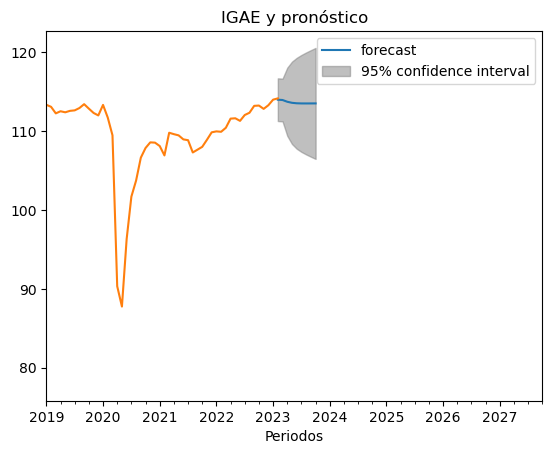

In [67]:
#libreria para la gráfica del pronostico
from statsmodels.graphics.tsaplots import plot_predict
#codigo
plot_predict(resultado2,start='2023-02-01',end='2023-10-01')
IGAE['IGAE'].plot()
plt.title('IGAE y pronóstico')
plt.xlim('2019-01','2027-10')
plt.show()

El pronostico de modelos ARIMA es bastante preciso a corto plazo(1-3 periodos), pero muy impreciso a largo plazo(más de 3 periodos)

In [69]:
resultado2.predict('2023-02-01','2023-10-01')

2023-02-01    113.980595
2023-03-01    113.940583
2023-04-01    113.718561
2023-05-01    113.584648
2023-06-01    113.525094
2023-07-01    113.506176
2023-08-01    113.503828
2023-09-01    113.506016
2023-10-01    113.508274
Freq: MS, Name: predicted_mean, dtype: float64